In [1]:
import ffn
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import pickle
import talib
from talib import MA_Type
import requests
import io

In [2]:
# 讀出預先下載好的股價資料
with open('stockdata', 'rb') as f:
    data = pickle.load(file=f)

# Q1. 畫出 Diamond Shape

In [3]:
def diamond(n):
    for i in range(n):
        print(" " *(n-i) + "*" * (2*i+1))
    for j in range(n-2,-1,-1):
        print(" " *(n-j) + "*" * (2*j+1))    

In [4]:
diamond(5)

     *
    ***
   *****
  *******
 *********
  *******
   *****
    ***
     *


# Q2. 刪除重複性資料

從 symbols01.txt 跟 symbols02.txt 讀入兩組股票代號，合併兩組代號，輸出一份無重複的股票代號到 symbols03.txt。

In [5]:
with open('symbols01.txt','r') as f1:
    symbols_01=f1.read().strip().split("\n")
    set_01=set(symbols_01)

In [6]:
with open('symbols02.txt','r') as f2:
    symbols_02=f2.read().strip().split("\n")
    set_02=set(symbols_02)

In [7]:
symbols_03 = list(set_01|set_02)

In [8]:
symbols_03

['MFNC',
 'RELL',
 'ADMP',
 'FCCO',
 'GAIA',
 'TA',
 'DZSI',
 'VSTM',
 'CCUR',
 'III',
 'IMMU',
 'RMTI',
 'IVTY',
 'CRNT',
 'TRIL',
 'GPRO',
 'GSUM',
 'CODA',
 'ESES',
 'ACRX',
 'TICC',
 'VRAY',
 'ITI',
 'BKEP',
 'SRRA',
 'GRPN',
 'GSVC',
 'PFIN',
 'FRAN',
 'HQCL',
 'PXLW',
 'SHLO',
 'FCCY',
 'BCOV',
 'NEO',
 'ALDX',
 'ORMP',
 'AMBCW',
 'IAM',
 'TTOO',
 'SALM',
 'LIFE',
 'LWAY',
 'MESO',
 'CELC',
 'PETX',
 'LINK',
 'MHLD',
 'KBLM',
 'CSSE',
 'MARA',
 'MAMS',
 'MMAC',
 'BRAC',
 'CCXI',
 'VOXX',
 'EML',
 'ASCMA',
 'PROV',
 'GLMD',
 'CRWS',
 'OBSV',
 'SRAX',
 'TTS',
 'GWRS',
 'AKTS',
 'DXLG',
 'ESND',
 'ABCD',
 'CTIC',
 'HMHC',
 'TAX',
 'PPSI',
 'FTD',
 'SNDX',
 'LCA',
 'AUBN',
 'USLB',
 'GIFI',
 'CYBE',
 'ZFGN',
 'VIRC',
 'VRA',
 'KMDA',
 'MTFB',
 'DHXM',
 'TGLS',
 'PSCI',
 'GSIT',
 'RDNT',
 'DWIN',
 'ZYNE',
 'PIH',
 'DCIX',
 'IMMR',
 'TRVG',
 'LACQU',
 'BLFS',
 'OPK',
 'KGJI',
 'HAIR',
 'ZLAB',
 'CMSSU',
 'OTIC',
 'TNTR',
 'EDGE',
 'MAGS',
 'ASYS',
 'SIGM',
 'USAP',
 'BKEPP',
 'AVID',
 

In [9]:
with open('symbols03.txt','w') as f3:
    for i in symbols_03:
        f3.write(i.strip().upper()+"\n")
      

# Q3. 下載台灣上市公司基本資料

寫一個程式從 [http://dts.twse.com.tw/opendata/t187ap03_L.csv](http://dts.twse.com.tw/opendata/t187ap03_L.csv) 下載台灣上市公司基本資料，並輸出成 pandas dataframe。

In [10]:
r = requests.get("http://dts.twse.com.tw/opendata/t187ap03_L.csv")
r.encoding = "big5"
q3 = io.StringIO(r.text)
Q3 = pd.read_csv(q3, skiprows=1)

ConnectionError: HTTPConnectionPool(host='dts.twse.com.tw', port=80): Max retries exceeded with url: /opendata/t187ap03_L.csv (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001DEC3F04470>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [ ]:
r = requests.get("http://dts.twse.com.tw/opendata/t187ap03_L.csv")
r.encoding = "big5"

In [11]:
q3 = io.StringIO(r.text)
Q3 = pd.read_csv(q3, skiprows=1)
Q3

NameError: name 'r' is not defined

# Q4. 畫出技術曲線

請畫出除了上課提過的線型之外的任何技術曲線，並寫註解說明。

In [12]:
df = data['GOOG']

In [13]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,769.500000,769.500000,758.340027,758.880005,758.880005,1500900
2016-01-04,743.000000,744.059998,731.257996,741.840027,741.840027,3272800
2016-01-05,746.450012,752.000000,738.640015,742.580017,742.580017,1950700
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000
2016-01-07,730.309998,738.500000,719.059998,726.390015,726.390015,2963700
2016-01-08,731.450012,733.229980,713.000000,714.469971,714.469971,2450900
2016-01-11,716.609985,718.854980,703.539978,716.030029,716.030029,2089300
2016-01-12,721.679993,728.750000,717.317017,726.070007,726.070007,2024500
2016-01-13,730.849976,734.739990,698.609985,700.559998,700.559998,2501700


In [14]:
# 計算均線
df['5d'] = pd.Series.rolling(df['Close'], window=5).mean()
df['20d'] = pd.Series.rolling(df['Close'], window=20).mean()
df['60d'] = pd.Series.rolling(df['Close'], window=60).mean()

In [15]:
# 計算 RSV(9天)
df['RSV'] = 100*( (df['Close'] - df['Low'].rolling(window=9).min())/
                 (df['High'].rolling(window=9).max() - df['Low'].rolling(window=9).min()) )


In [16]:
#計算 K(9天)
df['K']= np.nan
df['K'][7] = 50
for i in range(8,len(df)):
    K_value = (1/3) * df['RSV'][i] + (2/3) *df['K'][i-1]
    df['K'][i] = K_value

C:\Users\123\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\123\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
#計算 D(9天)
df['D']= np.nan
df['D'][7] = 50
for i in range(8,len(df)):
    D_value = (1/3) * df['K'][i] + (2/3) *df['D'][i-1]
    df['D'][i] = D_value

C:\Users\123\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\123\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
#計算 J(9天)
df['J']=3*df['D']-2*df['K']
df

,Open,High,Low,Close,Adj Close,Volume,5d,20d,60d,RSV,K,D,J
Date,,,,,,,,,,,,,
2015-12-31,769.500000,769.500000,758.340027,758.880005,758.880005,1500900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,743.000000,744.059998,731.257996,741.840027,741.840027,3272800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,746.450012,752.000000,738.640015,742.580017,742.580017,1950700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,730.309998,738.500000,719.059998,726.390015,726.390015,2963700,742.662012,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,731.450012,733.229980,713.000000,714.469971,714.469971,2450900,733.780005,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-11,716.609985,718.854980,703.539978,716.030029,716.030029,2089300,728.618005,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-12,721.679993,728.750000,717.317017,726.070007,726.070007,2024500,725.316003,NaN,NaN,NaN,50.000000,50.000000,50.000000
2016-01-13,730.849976,734.739990,698.609985,700.559998,700.559998,2501700,716.704004,NaN,NaN,2.750758,34.250253,44.750084,65.749747


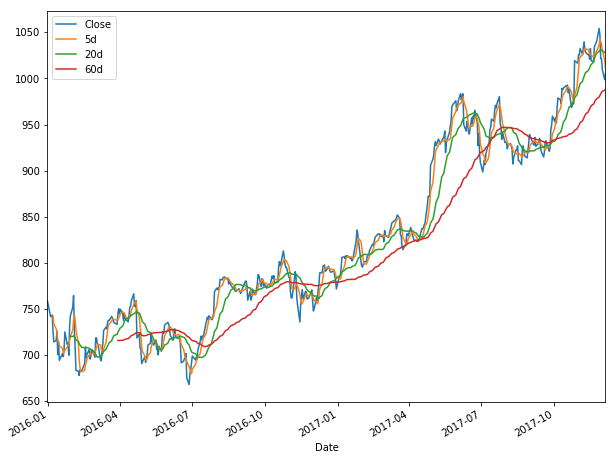

In [19]:
df[['Close','5d','20d','60d']].plot(legend='best', figsize=(10,8))

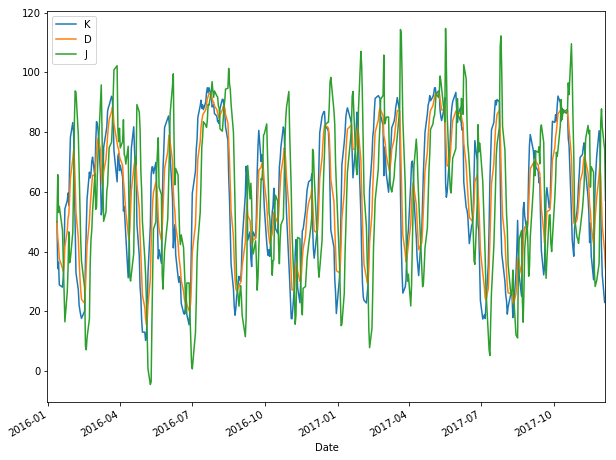

In [20]:
df[['K','D','J']].plot(legend='best', figsize=(10,8))

# Q5. 策略回測

In [21]:
# 計算 MaxDD
def DrawDownAnalysis(cumRet):
    dd_series = ffn.core.to_drawdown_series(cumRet)
    dd_details = ffn.core.drawdown_details(dd_series)
    return dd_details['drawdown'].min(), dd_details['days'].max()

In [22]:
# 利用策略產生的持有部位資訊，計算底下四個指標來判斷投資績效
# sharpe ratio: 判斷報酬的好壞跟穩定度，數值越大越好
# maxdd: maximum drawdown, 最糟糕的狀況會賠幾 %
# maxddd: maximum drawdown duration, 低於上一次最高報酬的天數
# cumRet[-1]: 最後賺的 % 數

def indicators(df):
    dailyRet = df['Close'].pct_change()
    excessRet = (dailyRet - 0.04/252)[df['positions'] == 1]
    SharpeRatio = np.sqrt(252.0)*np.mean(excessRet)/np.std(excessRet)
    
    cumRet = np.cumprod(1+excessRet)
    
    maxdd, maxddd = DrawDownAnalysis(cumRet)
    
    return SharpeRatio, maxdd, maxddd, cumRet[-1]

In [23]:
# 這是我們的策略的部分
# 主要只是要算出進出的訊號 signals 跟何時持有部位 positions
# 底下是一個突破系統的範例

def Breakout_strategy(df):
    # Donchian Channel
    df['20d_high'] = np.round(pd.Series.rolling(df['Close'], window=20).max(), 2)
    df['10d_low'] = np.round(pd.Series.rolling(df['Close'], window=10).min(), 2)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] > df['20d_high'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] < df['10d_low'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [24]:
def RSI_7030_strategy(df):
    df['RSI'] = talib.RSI(df['Close'].values)
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['RSI'][t-1] < 30:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['RSI'][t-1] > 70:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [25]:
def BBands_strategy(df):
    df['UBB'], df['MBB'], df['LBB'] = talib.BBANDS(df['Close'].values, matype=MA_Type.T3)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] < df['LBB'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] > df['UBB'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [26]:
# 定義你的策略
# 進場條件 : 當 K > D 且 K, D 皆 < 20  黃金交叉 買進
# 出場條件 : 當 D < K 且 K, D 皆 > 80  死亡交叉 賣出

def M064030046_strategy(df):
    # 計算 RSV(9天)
    df['RSV'] = 100*( (df['Close'] - df['Low'].rolling(window=9).min())/
                     (df['High'].rolling(window=9).max() - df['Low'].rolling(window=9).min()) )

    #計算 K(9天)
    df['K']= np.nan
    df['K'][7] = 50
    for i in range(8,len(df)):
        K_value = (1/3) * df['RSV'][i] + (2/3) *df['K'][i-1]
        df['K'][i] = K_value
    #計算 D(9天)
    df['D']= np.nan
    df['D'][7] = 50
    for i in range(8,len(df)):
        D_value = (1/3) * df['K'][i] + (2/3) *df['D'][i-1]
        df['D'][i] = D_value        
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if( (df['K'][t] > df['D'][t]) & (df['K'][t]<20) & (df['D'][t]<20) ):
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif ( (df['K'][t] < df['D'][t]) & (df['K'][t]>80) & (df['D'][t]>80) ):
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False    
   
    df['positions'] = df['signals'].cumsum().shift()
    return df

In [27]:
def apply_strategy(strategy, df):
    return strategy(df)

In [28]:
# 計算各支股票的回測結果
results = []

#strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy, 學號_strategy]
strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy,  M064030046_strategy]

for symbol in data:
    for strategy in strategies:
        try:
            apply_strategy(strategy, data[symbol])
            if np.all(data[symbol]['signals']==0):
                print("Symbol:", symbol, "使用", strategy.__name__, "策略沒有出現買賣訊號。")
                continue
            SharpeRatio, maxdd, maxddd, finalRet = indicators(data[symbol])
            days = (data[symbol].index[-1] - data[symbol].index[0]).days
            results.append((SharpeRatio, maxdd, maxddd, finalRet, days,
                            data[symbol][data[symbol]['signals'] > 0]['signals'].sum(), symbol, strategy.__name__))
        except Exception as e:
            print("Error occurs at symbol:", symbol, "Strategy:", strategy.__name__, "==>", e.args)

C:\Users\123\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\123\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\123\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\123\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 


Symbol: AMOT 使用 M064030046_strategy 策略沒有出現買賣訊號。
Symbol: CDZI 使用 M064030046_strategy 策略沒有出現買賣訊號。
Symbol: RICK 使用 M064030046_strategy 策略沒有出現買賣訊號。
Symbol: SCAC 使用 M064030046_strategy 策略沒有出現買賣訊號。
Symbol: HBCP 使用 M064030046_strategy 策略沒有出現買賣訊號。
Symbol: LCA 使用 M064030046_strategy 策略沒有出現買賣訊號。
Symbol: PSC 使用 M064030046_strategy 策略沒有出現買賣訊號。
Symbol: NEWT 使用 M064030046_strategy 策略沒有出現買賣訊號。


In [29]:
results_df = pd.DataFrame(results, columns=['sharpe','MaxDrawDown','MaxDrawDownDuration','returns', 
                                            'days', 'entries','symbol','strategy'])

In [30]:
results_df.head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
0,0.131503,-0.208296,281,0.995734,705,11,TICC,Breakout_strategy
1,0.395515,-0.244817,482,1.077756,705,2,TICC,RSI_7030_strategy
2,0.102787,-0.231763,426,0.984521,705,20,TICC,BBands_strategy
3,0.575635,-0.238050,432,1.070095,705,2,TICC,M064030046_strategy
4,1.365570,-0.361485,299,1.631388,705,12,TWIN,Breakout_strategy


In [31]:
results_df.sort_values('MaxDrawDown',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
68,6.306176,-0.003654,122,1.028222,473,3,LCA,RSI_7030_strategy
15,10.243474,-0.006251,3,1.132402,705,1,GOOG,RSI_7030_strategy
69,2.038551,-0.013673,119,1.060527,473,16,LCA,BBands_strategy
63,1.085572,-0.023454,135,1.049505,384,12,SCAC,BBands_strategy
33,3.040178,-0.023844,58,1.073352,203,3,CSML,Breakout_strategy


In [32]:
results_df.sort_values('returns',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
9,2.013777,-0.219296,167,2.477803,705,4,AMOT,RSI_7030_strategy
13,2.062962,-0.286661,113,2.422460,705,22,CDZI,BBands_strategy
72,2.136744,-0.454342,191,2.400221,705,21,BBGI,BBands_strategy
5,2.424484,-0.169115,115,2.151881,705,3,TWIN,RSI_7030_strategy
7,3.566323,-0.169115,34,2.124412,705,3,TWIN,M064030046_strategy
